In [2]:
import cv2
import av
import matplotlib.pyplot as plt
from time import sleep
import numpy as np

In [3]:
%matplotlib inline

In [4]:
FILE = "vids/Almesbar_face_20_08_2025_1.mkv"

Start


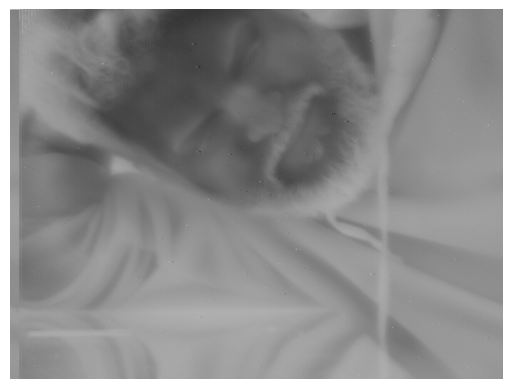

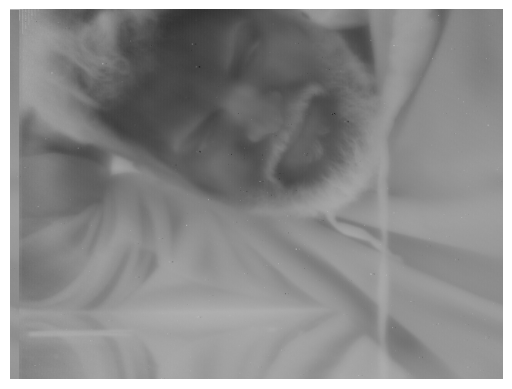

In [21]:
# Read the video
cont = av.open(FILE)
vstream  = cont.streams.video[0]
img = cv2.imread(FILE)
print("Start")

c = 0
# Read fivdeo frames
for frame in cont.decode(vstream):
    
    arr = frame.to_ndarray(format="gray16le")
    
    im = plt.imshow(arr, cmap="gray")
    plt.axis("off")

    c+=1
    plt.pause(1)
    plt.show()
    if c == 2: # Since matplotlib will keep showing images I limited the shown frames to one, more can be show as pleased, but this needs to be fixed anyway
        break    
    

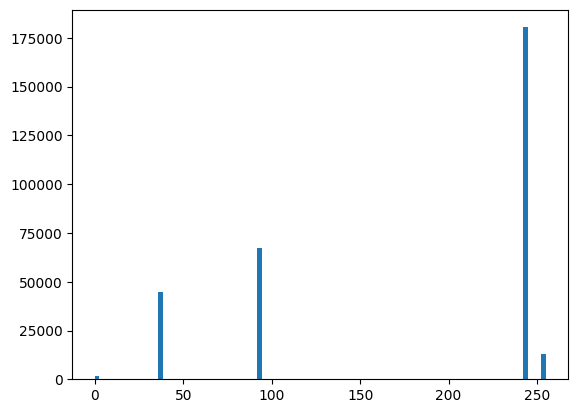

In [5]:
video = cv2.VideoCapture(FILE)

success, frame = video.read()

if success:
    # Save the frame as JPG
    cv2.imwrite("frame.jpg", frame)
lab_img = cv2.cvtColor(frame,cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab_img)
equ = cv2.equalizeHist(l)
plt.hist(equ.flat, bins=100, range=(0,255))




video.release()

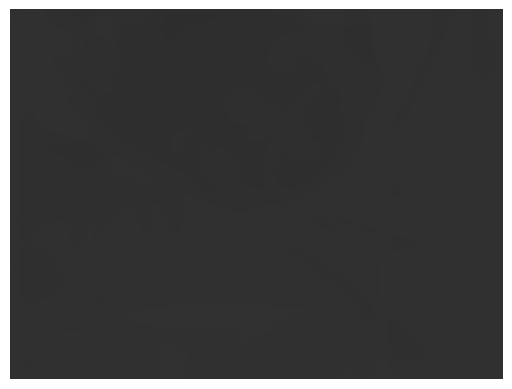

In [10]:
img_rgb  = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

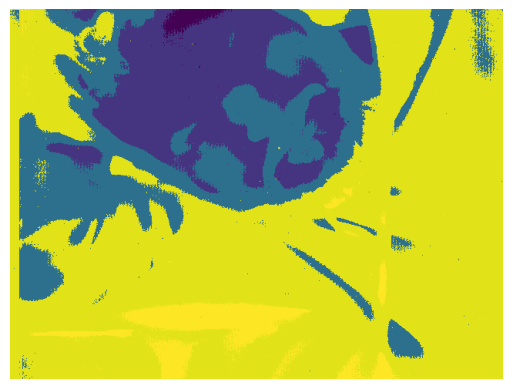

In [11]:
equ2 = cv2.equalizeHist(l)
plt.imshow(equ2)
plt.axis("off")
plt.show()

NameError: name 'equalized' is not defined

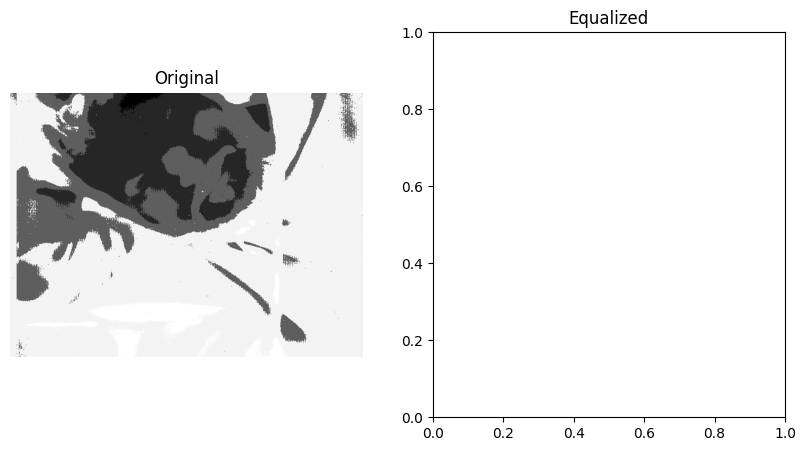

In [12]:
# Show results
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(equ2, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Equalized")
plt.imshow(equalized, cmap='gray')
plt.axis("off")

plt.show()


## CV2 read for images
reading the images in CV2 will destroy the quality, so i will read it using av and save a frame then re read it using cv2.absdiff
## why i need to read it using cv2 library?
so i could take advantage of cv2 filters such as CLAHE, histequa and linear transformation.

otherwise i will need to look for different library or do it manually
